In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.impute import KNNImputer, SimpleImputer
import datetime
import sys
import os


In [2]:
utilities_path = os.path.abspath('../utilities')
sys.path.append(utilities_path)

from connexion import fetch_artists_dataframe

df = fetch_artists_dataframe()
print(df.head())

                        _id               artist_id   name  \
0  6787927675ad556bba408186  1ZZ80dIJCjKdQd5Hu6Mjsk  松谷 祐子   
1  6787927975ad556bba408187  5sIpD4IMJlqyaNxA8qNTnJ    林嘉欣   
2  6787927c75ad556bba408188  2bgJqyxN97sNfRqoPhsdQI    林姍姍   
3  6787927e75ad556bba408189  1VBXPX6NAo736pqr4MQWp6    林師傑   
4  6787928275ad556bba40818a  2KdnPDVFj8F2uhqgeMHXea     林強   

                                              genres  popularity  followers  \
0                                                 []          30       1108   
1                                         [cantopop]          22       3760   
2                                 [classic cantopop]          29       6935   
3                     [cantopop, hong kong tv drama]          18       5035   
4  [classic mandopop, taiwan pop, taiwan singer-s...          28      28290   

                                              albums  
0  [{'album_id': '3Q80IekfQVdlXUnavNDuTI', 'album...  
1  [{'album_id': '70MhwkqG5XzTYqLwgzEEmW',

In [3]:
# Vérifier les types de données de chaque colonne
print(df.dtypes)


_id           object
artist_id     object
name          object
genres        object
popularity     int64
followers      int64
albums        object
dtype: object


### Remplacer les valeurs manquantes par la médiane pour les colonnes numériques

In [9]:
# Sélectionner uniquement les colonnes numériques
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Remplir les valeurs manquantes avec la médiane des colonnes numériques
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df[numerical_cols]


,popularity,followers
0,30,1108
1,22,3760
2,29,6935
3,18,5035
4,28,28290
...,...,...
4188,21,7011
4189,12,8396
4190,50,293275
4191,12,48


### Supprimer les lignes avec des valeurs manquantes

In [5]:
df = df.dropna()

### Boxplot pour chaque variable numérique

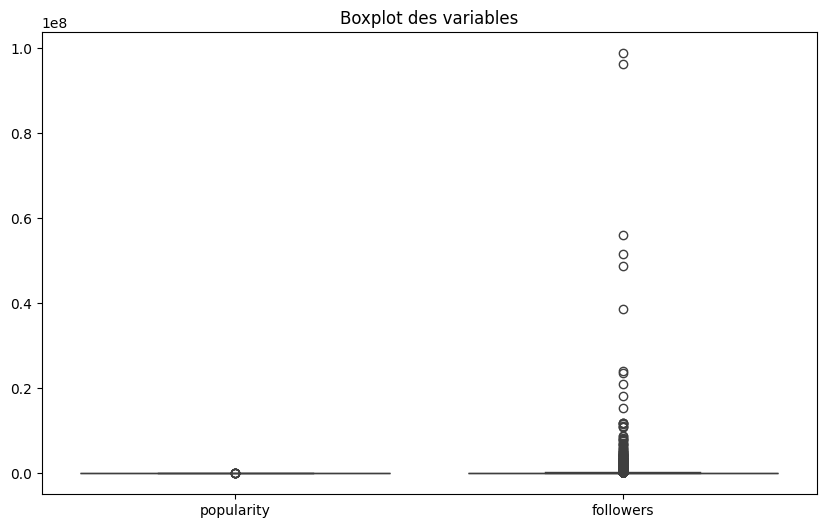

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot des variables")
plt.show()

### Calcul de l'IQR pour chaque variable numérique

In [7]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)


Q1: popularity      18.0
followers     3357.0
Name: 0.25, dtype: float64
Q3: popularity       44.0
followers     76559.0
Name: 0.75, dtype: float64
IQR: popularity       26.0
followers     73202.0
dtype: float64


### Détection des valeurs aberrantes

In [10]:
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))

print(outliers)

      popularity  followers
0          False      False
1          False      False
2          False      False
3          False      False
4          False      False
...          ...        ...
4188       False      False
4189       False      False
4190       False       True
4191       False      False
4192       False      False

[3817 rows x 2 columns]


### Afficher les valeurs aberrantes

In [11]:
print(outliers.sum())

popularity      8
followers     577
dtype: int64


### Calcul des Z-scores pour les colonnes numériques

In [13]:
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
z_scores

,popularity,followers
0,0.077873,0.114440
1,0.523264,0.113541
2,0.133547,0.112465
3,0.745959,0.113109
4,0.189221,0.105226
...,...,...
4188,0.578937,0.112439
4189,1.080001,0.111969
4190,1.035602,0.015399
4191,1.080001,0.114799


### Détection des valeurs aberrantes (au-delà de 3 écarts-types)

In [14]:
outliers_z = (z_scores > 3)
outliers_z

,popularity,followers
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
4188,False,False
4189,False,False
4190,False,False
4191,False,False


### Affichage des valeurs aberrantes

In [15]:
print(outliers_z.sum())

popularity     7
followers     18
dtype: int64


### Suppression des lignes avec des valeurs aberrantes détectées par IQR

In [18]:
df_cleaned = df[~outliers.any(axis=1)]
df_cleaned

,_id,artist_id,name,genres,popularity,followers,albums
0,6787927675ad556bba408186,1ZZ80dIJCjKdQd5Hu6Mjsk,松谷 祐子,[],30,1108,"[{'album_id': '3Q80IekfQVdlXUnavNDuTI', 'album..."
1,6787927975ad556bba408187,5sIpD4IMJlqyaNxA8qNTnJ,林嘉欣,[cantopop],22,3760,"[{'album_id': '70MhwkqG5XzTYqLwgzEEmW', 'album..."
2,6787927c75ad556bba408188,2bgJqyxN97sNfRqoPhsdQI,林姍姍,[classic cantopop],29,6935,"[{'album_id': '1sRB7jxq1uG6MZ0XJtlKx1', 'album..."
3,6787927e75ad556bba408189,1VBXPX6NAo736pqr4MQWp6,林師傑,"[cantopop, hong kong tv drama]",18,5035,"[{'album_id': '6PNm5CsLMpX39CisTsnafz', 'album..."
4,6787928275ad556bba40818a,2KdnPDVFj8F2uhqgeMHXea,林強,"[classic mandopop, taiwan pop, taiwan singer-s...",28,28290,"[{'album_id': '3duYqUz3yqXhzLPu14ezgG', 'album..."
...,...,...,...,...,...,...,...
4187,67bde9266c2fab468545fcf7,5H9FqVLOnIpSeK5KYoVFRD,Von D,"[dubstep, dub]",25,10031,"[{'album_id': '7Hhoqg54HLb60BfFrClU6d', 'album..."
4188,67bde9296c2fab468545fcf8,6rRQbKeGYpX8armrlaxWcn,Von Spar,[],21,7011,"[{'album_id': '4gRU9j7RCCo1UZKgLckA8h', 'album..."
4189,67bde92c6c2fab468545fcf9,52PhaHOR4Z9sjdtpFXy96u,Von Thronstahl,"[neofolk, dark ambient, neoclassical, industri...",12,8396,"[{'album_id': '12YgqlOs3Q4lMk5SEUh4Ir', 'album..."
4191,67bde92f6c2fab468545fcfb,407xXcIH8zFLIsEVarOhb7,Von Won,[christian hip hop],12,48,"[{'album_id': '6yZiWgTfIdDpwKWNE1FRJX', 'album..."


### Suppression des lignes avec des valeurs aberrantes détectées par Z-score

In [20]:
df_cleaned_z = df[(z_scores <= 3).all(axis=1)]
df_cleaned_z

,_id,artist_id,name,genres,popularity,followers,albums
0,6787927675ad556bba408186,1ZZ80dIJCjKdQd5Hu6Mjsk,松谷 祐子,[],30,1108,"[{'album_id': '3Q80IekfQVdlXUnavNDuTI', 'album..."
1,6787927975ad556bba408187,5sIpD4IMJlqyaNxA8qNTnJ,林嘉欣,[cantopop],22,3760,"[{'album_id': '70MhwkqG5XzTYqLwgzEEmW', 'album..."
2,6787927c75ad556bba408188,2bgJqyxN97sNfRqoPhsdQI,林姍姍,[classic cantopop],29,6935,"[{'album_id': '1sRB7jxq1uG6MZ0XJtlKx1', 'album..."
3,6787927e75ad556bba408189,1VBXPX6NAo736pqr4MQWp6,林師傑,"[cantopop, hong kong tv drama]",18,5035,"[{'album_id': '6PNm5CsLMpX39CisTsnafz', 'album..."
4,6787928275ad556bba40818a,2KdnPDVFj8F2uhqgeMHXea,林強,"[classic mandopop, taiwan pop, taiwan singer-s...",28,28290,"[{'album_id': '3duYqUz3yqXhzLPu14ezgG', 'album..."
...,...,...,...,...,...,...,...
4188,67bde9296c2fab468545fcf8,6rRQbKeGYpX8armrlaxWcn,Von Spar,[],21,7011,"[{'album_id': '4gRU9j7RCCo1UZKgLckA8h', 'album..."
4189,67bde92c6c2fab468545fcf9,52PhaHOR4Z9sjdtpFXy96u,Von Thronstahl,"[neofolk, dark ambient, neoclassical, industri...",12,8396,"[{'album_id': '12YgqlOs3Q4lMk5SEUh4Ir', 'album..."
4190,67bde92e6c2fab468545fcfa,0uNoScPvcAL4krqNZfeJBq,Von Wegen Lisbeth,[german pop],50,293275,"[{'album_id': '35VOrTfiIKL0LxHFJPm6rV', 'album..."
4191,67bde92f6c2fab468545fcfb,407xXcIH8zFLIsEVarOhb7,Von Won,[christian hip hop],12,48,"[{'album_id': '6yZiWgTfIdDpwKWNE1FRJX', 'album..."


### Remplacer les valeurs aberrantes par la médiane

In [24]:
df_no_outliers = df.copy()

numeric_columns = df_no_outliers.select_dtypes(include='number').columns

for column in numeric_columns:
    df_no_outliers[column] = df_no_outliers[column].where(~outliers[column], df_no_outliers[column].median())



In [25]:

df_no_outliers.to_csv('df_no_outliers.csv', index=False)
